<class 'numpy.ndarray'>


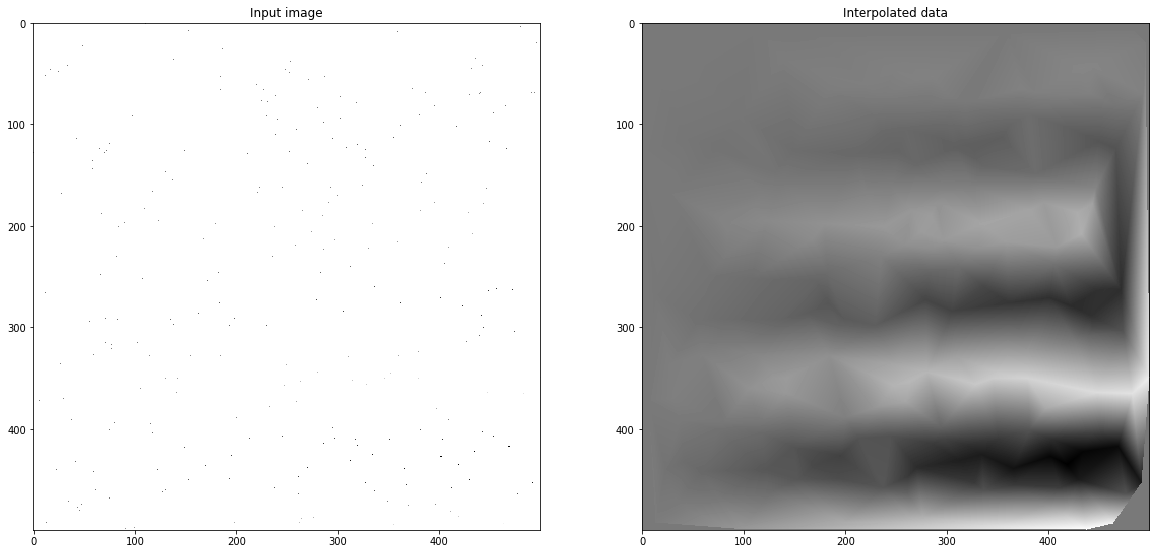

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

x = np.linspace(0, 1, 500)
y = x[:, None]
image = x * y *np.sin(y*20)
print(type(image))

# Destroy some values
mask = np.random.random(image.shape) > 0.001
image[mask] = np.nan

valid_mask = ~np.isnan(image)
coords = np.array(np.nonzero(valid_mask)).T
values = image[valid_mask]

it = interpolate.LinearNDInterpolator(coords, values, fill_value=0)

filled = it(list(np.ndindex(image.shape))).reshape(image.shape)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))

#ax0.imshow(image, cmap='gray', interpolation='nearest')
ax0.imshow(image, cmap='gray')
ax0.set_title('Input image')
#ax1.imshow(filled, cmap='gray', interpolation='nearest')
ax1.imshow(filled, cmap='gray')
ax1.set_title('Interpolated data')
plt.show()

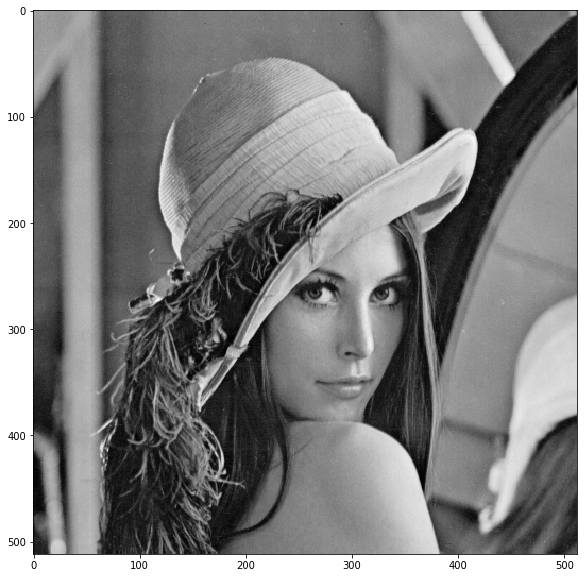

In [2]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as st

#HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/circle_128.png')
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
plt.figure(figsize = (10,10))
plt.imshow(Y, cmap="gray")
# Y //= 256

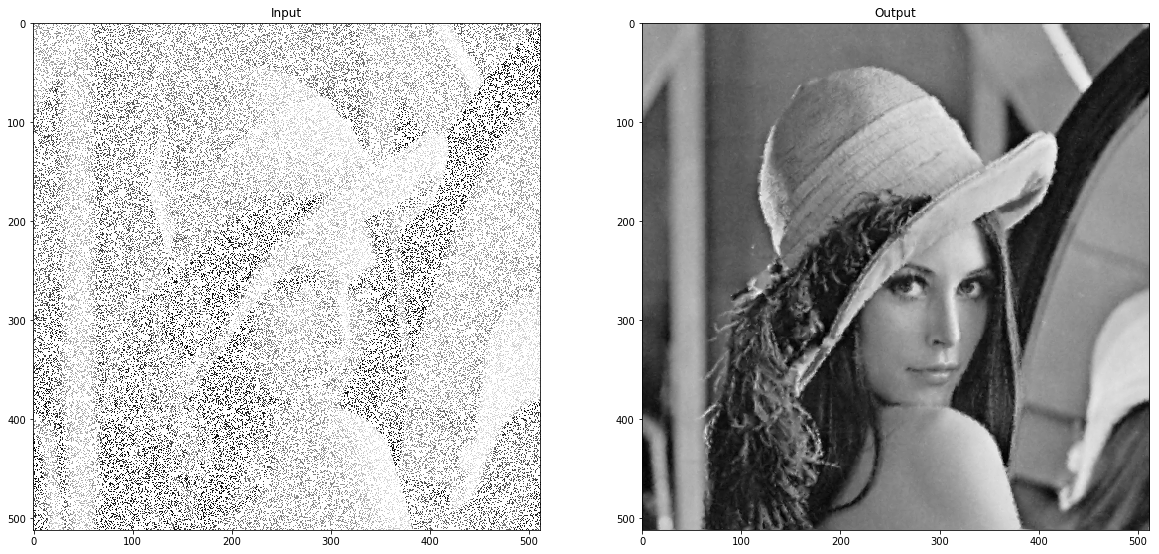

In [3]:
image = Y.astype(float)

# Destroy some values
mask = np.random.random(image.shape) > 0.25
image[mask] = np.nan

valid_mask = ~np.isnan(image)
coords = np.array(np.nonzero(valid_mask)).T
values = image[valid_mask]

it = interpolate.LinearNDInterpolator(coords, values, fill_value=128, rescale=True)

filled = it(list(np.ndindex(image.shape))).reshape(image.shape)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(image, cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(filled, cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Output')
plt.show()

In [4]:
print(Y[10][10], filled[10][10])
print(Y.max())

157 158.33333333333334
245


In [5]:
import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())
print(pywt.Modes.modes)

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='bior3.5'
wavelet = 'db15'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [6]:
# (1) Calculamos la DWT estándar de la imagen
orig_LL, (LH, HL, HH) = pywt.dwt2(Y, wavelet, mode='per')

(256, 256)


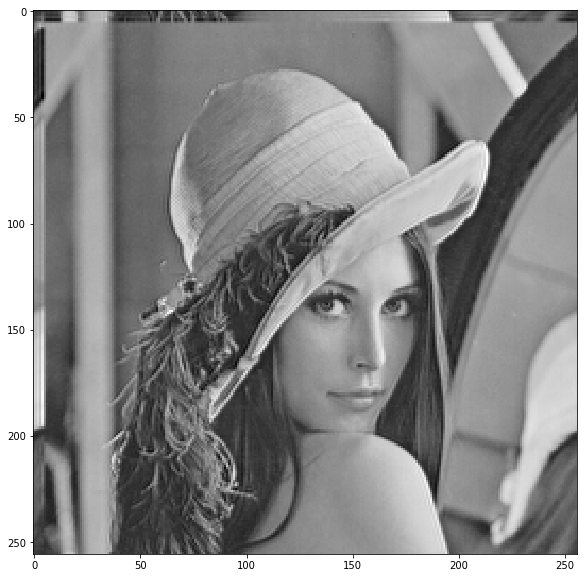

In [7]:
plt.figure(figsize = (10,10))
LL = orig_LL.copy()
plt.imshow(LL, cmap="gray")
print(LL.shape)

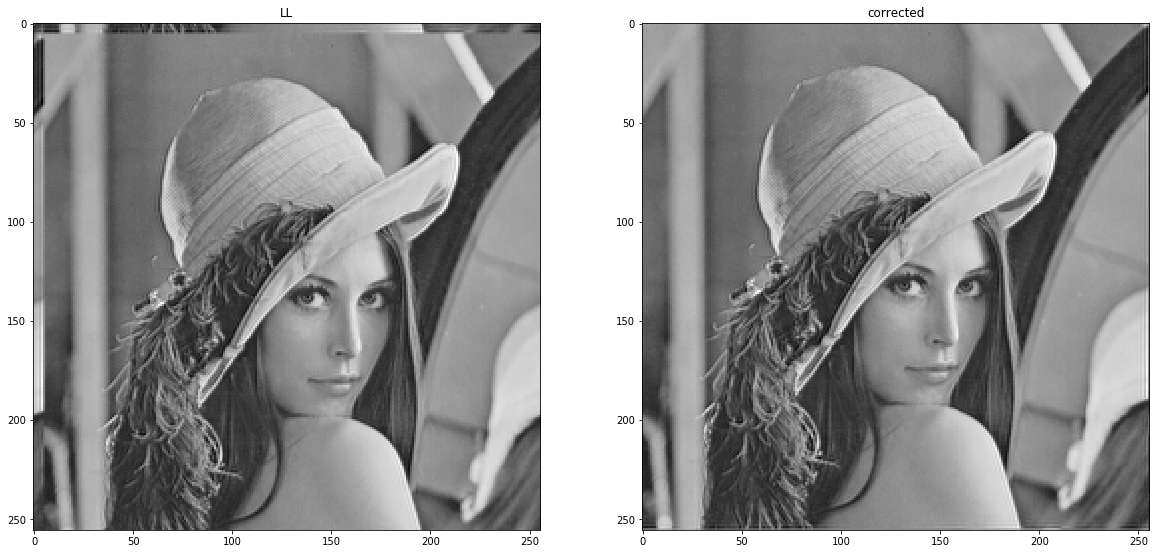

313.0036651321163


In [8]:
# Ojo, dependiendo del filtro seleccionado para la DWT, la subbanda LL puede estar desplazada abajo y a la derecha.
# Usar la siguiente instrucción para corregir este problema.
corrected = np.roll(np.roll(LL,-6,axis=0),-6,axis=1)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
#ax0.imshow(image, cmap='gray', interpolation='nearest')
ax0.imshow(LL, cmap='gray')
ax0.set_title('LL')
#ax1.imshow(filled, cmap='gray', interpolation='nearest')
ax1.imshow(corrected, cmap='gray')
ax1.set_title('corrected')
plt.show()
LL = corrected.copy()
print(LL[10][10])

In [9]:
print(orig_LL[5][5])

216.33077506956917


In [10]:
#orig_LL = np.copy(LL_)
#print(LL_.shape)
#LL = np.full((Y.shape[0]//2, Y.shape[1]//2), 128)
#print(LL.shape)
#LL[8:,:] = LL_[:,:]
#LL = LL[9::,9::]
LL /= 2.0
print(LL.shape)

(256, 256)


In [11]:
print(LL[5][5])

155.57118529610852


In [12]:
# Definimos una matriz de ceros con las dimensiones de una subbanda. Nos va a servir para interpolar
# y para encontrar la representación no crítica (en 3 subbandas LH, HL y HH) para la subbanda H.
zero_subband = np.zeros(HH.shape, np.float64)

In [13]:
LL2 = np.full(Y.shape, np.nan)

In [14]:
LL2[1::2,1::2]=LL
#LL2[::2,::2]=LL

In [15]:
print(LL2[0][0], LL2[0][1], LL2[1][0], LL2[1][1], LL2[2][0])

nan nan nan 157.5668577105303 nan


In [16]:
valid_mask = ~np.isnan(LL2)

In [17]:
coords = np.array(np.nonzero(valid_mask)).T
values = LL2[valid_mask]

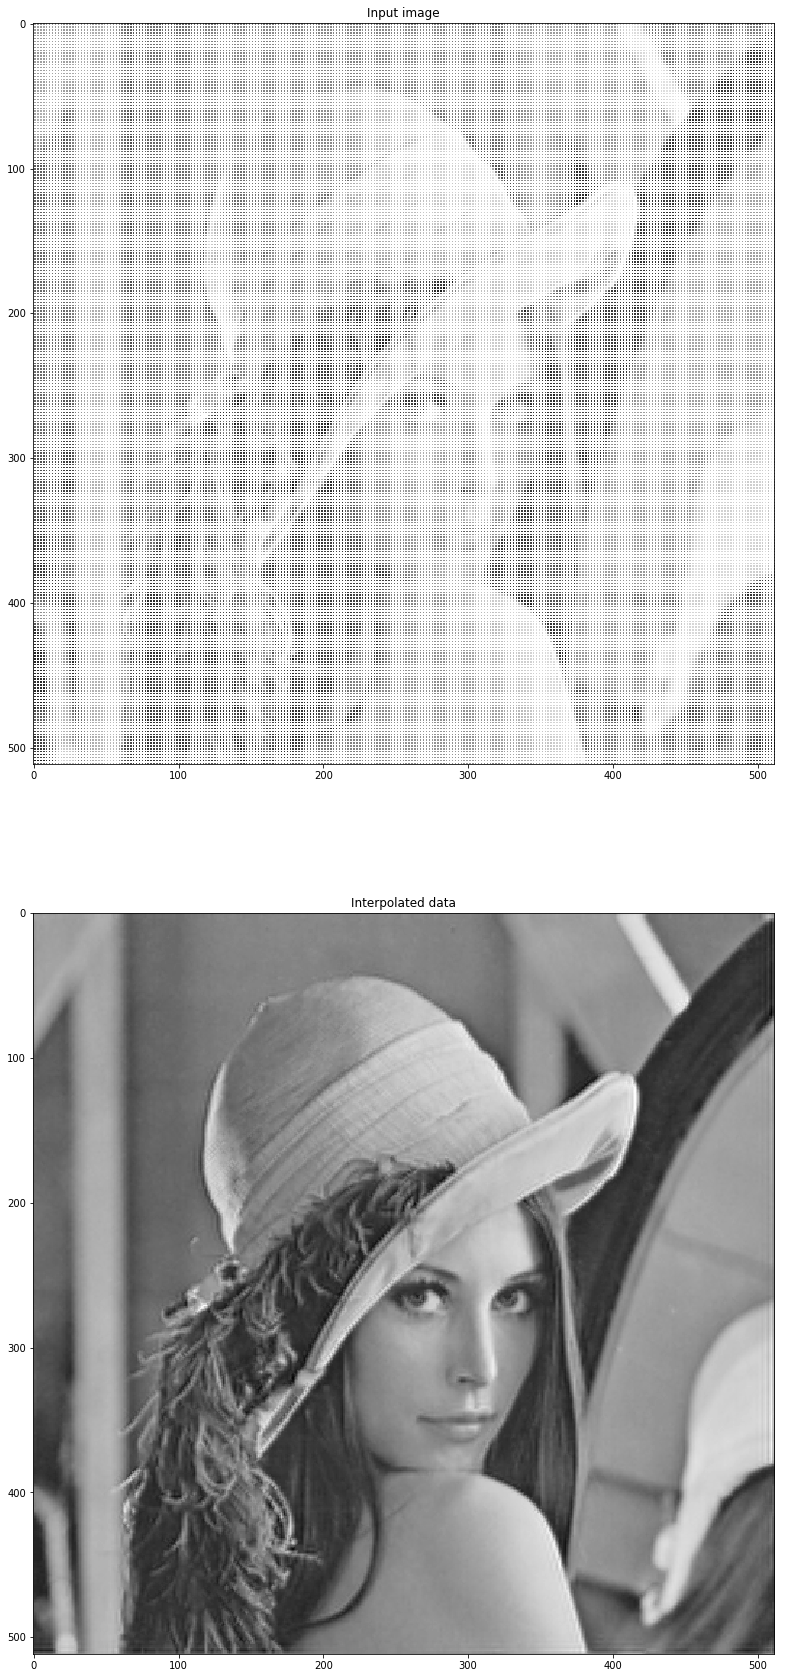

In [18]:
it = interpolate.LinearNDInterpolator(coords, values, fill_value=128)

filled = it(list(np.ndindex(LL2.shape))).reshape(LL2.shape)

f, (ax0, ax1) = plt.subplots(2, 1,figsize=(30,30))
ax0.imshow(LL2, cmap='gray', interpolation='nearest')
#ax0.imshow(LL2, cmap='gray')
ax0.set_title('Input image')
ax1.imshow(filled, cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Interpolated data')
plt.show()

In [19]:
print(filled[10][10])

158.91577852770837


In [20]:
print(filled.shape)

(512, 512)


In [21]:
# Ojo, dependiendo del filtro seleccionado para la DWT, la subbanda LL puede estar desplazada abajo y a la derecha.
# Usar la siguiente instrucción para corregir este problema.
corrected = np.roll(np.roll(filled,0,axis=0),0,axis=1)
print(corrected[20][20], filled[20][20])

155.742536774448 155.742536774448


-1.915778527708369 157 158.91577852770837 98.64085449944403 -81.54648705283273


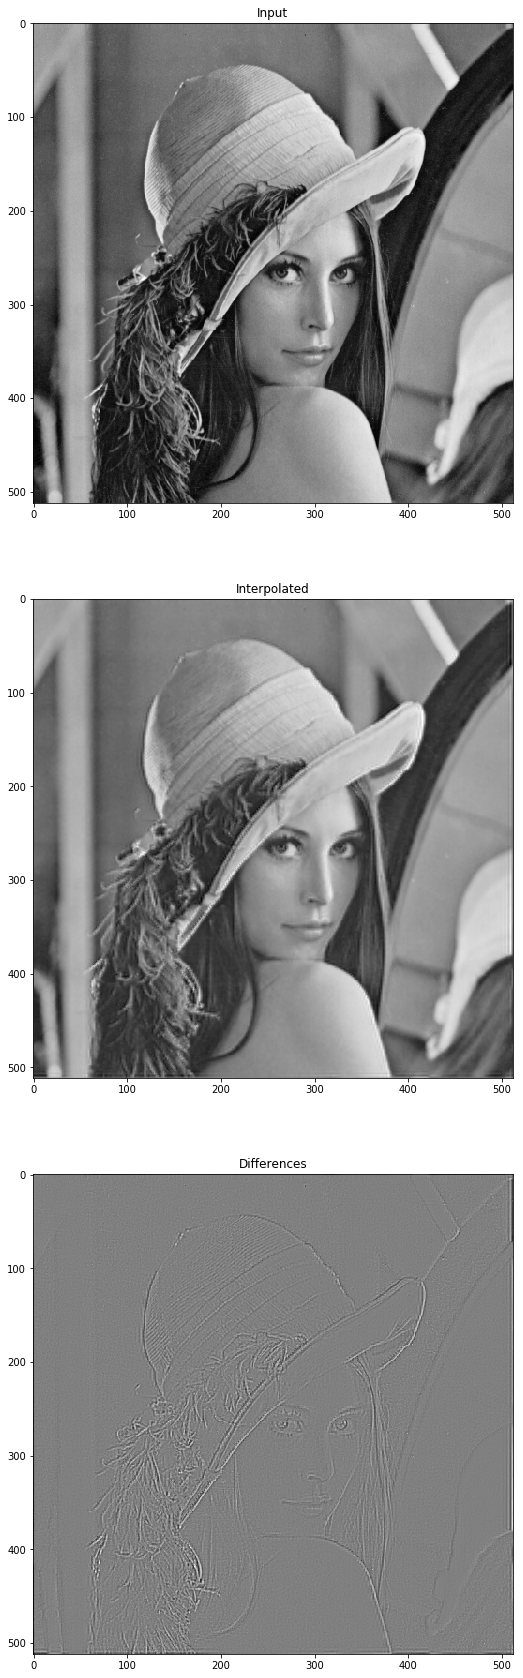

In [22]:
diff_LND = Y - corrected
print(diff_LND[10][10], Y[10][10], corrected[10][10], diff_LND[10:diff_LND.shape[0]-10,10:diff_LND.shape[1]-10].max(), diff_LND[10:diff_LND.shape[0]-10,10:diff_LND.shape[1]-10].min())
f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(30,30))
ax0.imshow(Y, cmap='gray', interpolation='nearest')
ax0.set_title('Input')
ax1.imshow(corrected, cmap='gray', interpolation='nearest')
ax1.set_title('Interpolated')
ax2.imshow(diff_LND, cmap='gray', interpolation='nearest')
ax2.set_title('Differences')
plt.show()

In [23]:
print(orig_LL[5][5])

216.33077506956917


In [24]:
LL3 = pywt.idwt2((orig_LL, (zero_subband, zero_subband, zero_subband)), wavelet, mode='per')

In [25]:
print(LL3[10][10])

157.15258585426383


-0.1525858542638332 157 157.15258585426383 46.26782007892289 -43.130785861858186


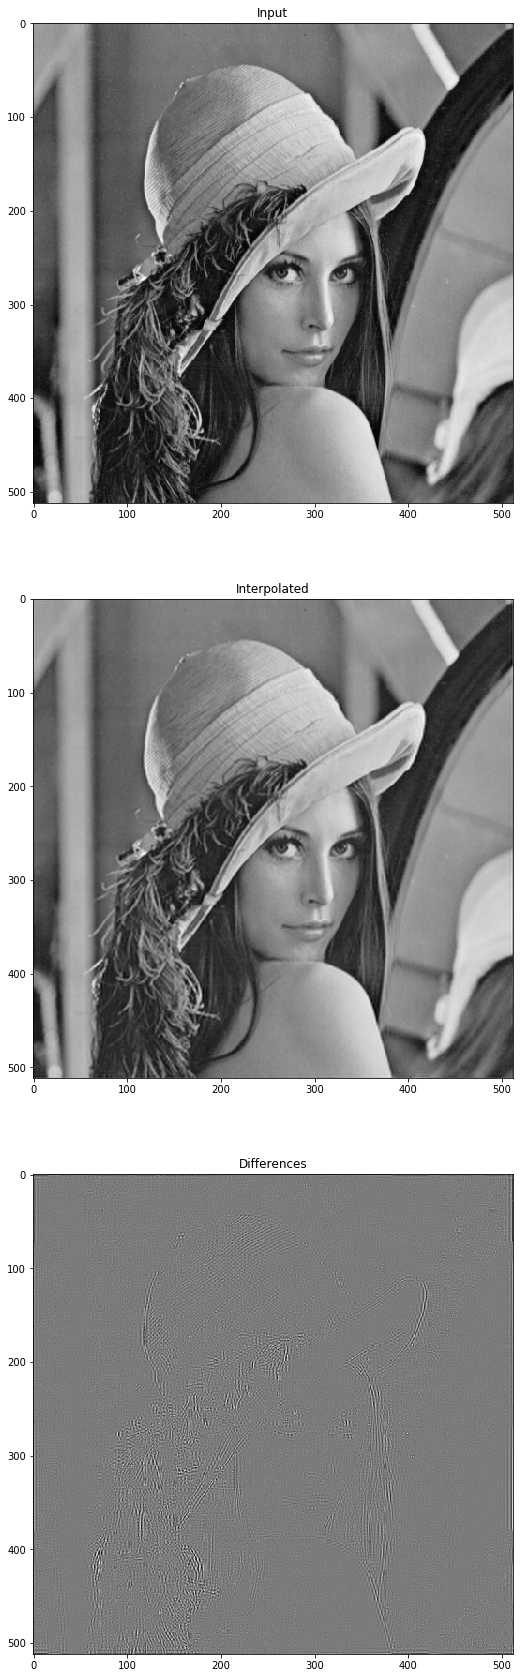

In [26]:
diff_wave = Y - LL3
print(diff_wave[10][10], Y[10][10], LL3[10][10], diff_wave.max(), diff_wave.min())
f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(30,30))
ax0.imshow(Y, cmap='gray', interpolation='nearest')
ax0.set_title('Input')
ax1.imshow(LL3, cmap='gray', interpolation='nearest')
ax1.set_title('Interpolated')
ax2.imshow(diff_wave, cmap='gray', interpolation='nearest')
ax2.set_title('Differences')
plt.show()

In [27]:
#hist_LND = cv2.calcHist([diff_LND[1:Y.shape[0]-1,1:Y.shape[1]-1]], [0], None, [256], [0, 256])
hist_LND = cv2.calcHist([(diff_LND[10:diff_LND.shape[0]-10,10:diff_LND.shape[1]-10] + 128).astype(np.uint8)], [0], None, [256], [0, 256])

In [28]:
#hist_wave = cv2.calcHist([diff_wave[1:Y.shape[0]-1,1:Y.shape[1]-1]], [0], None, [256], [0, 256])
hist_wave = cv2.calcHist([(diff_wave[10:diff_wave.shape[0]-10,10:diff_wave.shape[1]-10] + 128).astype(np.uint8)], [0], None, [256], [0, 256])

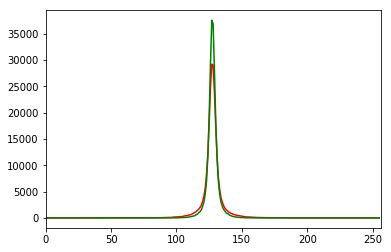

In [29]:
plt.plot(hist_LND, color='r')
plt.plot(hist_wave, color='g')
plt.xlim([0,256])
plt.show()

In [30]:
entropy_LND = st.entropy(hist_LND)[0]
print("Entropy using LND =", entropy_LND)

Entropy using LND = 3.0997677


In [31]:
entropy_wave = st.entropy(hist_wave)[0]
print("Entropy using wavelet =", entropy_wave)

Entropy using wavelet = 2.692966


In [32]:
LL_1, (LH_1, HL_1, HH_1) = pywt.dwt2(diff_LND, wavelet, mode='per')
LL_2, (LH_2, HL_2, HH_2) = pywt.dwt2(diff_wave, wavelet, mode='per')
print(LH_1[10][10], LH_2[10][10])
#hist_LND = cv2.calcHist([LH_1.astype('uint8')[2:LH_1.shape[0]-2,2:LH_1.shape[1]-2]], [0], None, [256], [0, 256])
hist_LND = cv2.calcHist([(LH_1[10:LH_1.shape[0]-10,10:LH_1.shape[1]-10]+128).astype('uint8')], [0], None, [256], [0, 256])
#hist_wave = cv2.calcHist([LH_2.astype('uint8')[2:LH_2.shape[0]-2,2:LH_2.shape[1]-2]], [0], None, [256], [0, 256])
hist_wave = cv2.calcHist([(LH_2[10:LH_1.shape[0]-10,10:LH_1.shape[1]-10]+128).astype('uint8') + 10], [0], None, [256], [0, 256])
print("Entropy using LND =", st.entropy(hist_LND)[0])
print("Entropy using wavelet =", st.entropy(hist_wave)[0])

1.345521856540802 0.979005508245349
Entropy using LND = 2.9134912
Entropy using wavelet = 2.7522612


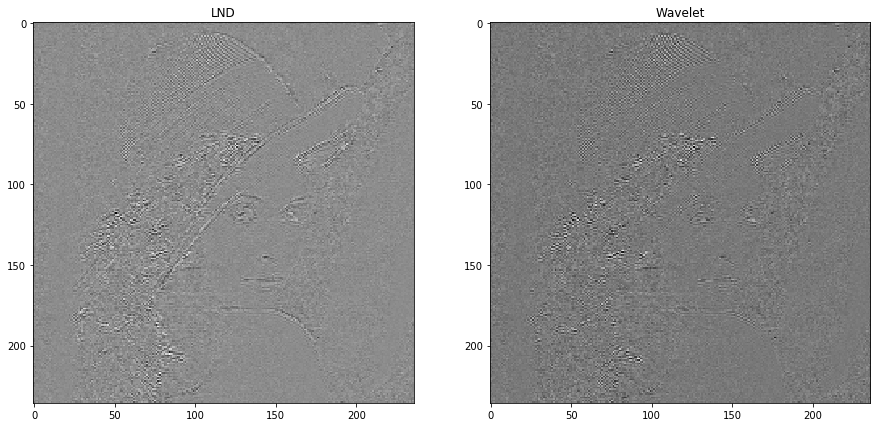

In [33]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,15))
ax0.imshow(LH_1[10:LH_1.shape[0]-10,10:LH_1.shape[1]-10], cmap='gray', interpolation='nearest')
ax0.set_title('LND')
ax1.imshow(LH_2[10:LH_1.shape[0]-10,10:LH_1.shape[1]-10], cmap='gray', interpolation='nearest')
ax1.set_title('Wavelet')
plt.show()

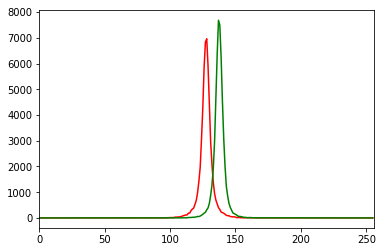

In [34]:
plt.plot(hist_LND, color='r')
plt.plot(hist_wave, color='g')
plt.xlim([0,256])
plt.show()

In [35]:
for i in range(10):
    for j in range(10):
        print(LH_1[i][j]+128, "(", np.round(LH_1[i][j]+128).astype(np.uint8), ")", end=' ')

127.30258963105068 ( 127 ) 122.55500958123501 ( 123 ) 130.26742794473148 ( 130 ) 132.81457442617545 ( 133 ) 123.06460827602591 ( 123 ) 126.22632637951607 ( 126 ) 131.68480730179763 ( 132 ) 124.50724004627983 ( 125 ) 131.91399817239315 ( 132 ) 130.4944206025383 ( 130 ) 122.72879583525302 ( 123 ) 129.0472578001259 ( 129 ) 129.61099306698028 ( 130 ) 129.65466297808229 ( 130 ) 131.249551912906 ( 131 ) 129.9364036129959 ( 130 ) 128.12672087148587 ( 128 ) 125.93906849609395 ( 126 ) 128.97578223533822 ( 129 ) 127.72561071593817 ( 128 ) 132.78823932156618 ( 133 ) 129.51946314851963 ( 130 ) 132.64346907124275 ( 133 ) 131.53865667630708 ( 132 ) 127.89137812952774 ( 128 ) 128.14036057302098 ( 128 ) 126.24931438917511 ( 126 ) 128.68085771759993 ( 129 ) 127.23535886114003 ( 127 ) 129.90074389771408 ( 130 ) 125.4006653274887 ( 125 ) 124.03162800912098 ( 124 ) 123.93107905519241 ( 124 ) 128.43889046527332 ( 128 ) 130.51836291269387 ( 131 ) 127.923367444258 ( 128 ) 129.20989637621096 ( 129 ) 128.01990